# Lesson 1: Fibonacci Numbers <a class="tocSkip">

It's common to begin the study of dynamic programming using [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) as an example. This is because they are literally a textbook example of transforming a recursive, top-down algorithm into an iterative, bottom-up one.

However, unlike the the 'sum of n numbers' and 'palindrome' problems we explored previously, there is real motivation to make this transformation.

## Find the n'th Fibonacci number

Fibonacci numbers form a series defined by a recurrence formula. In _our_ implementation, we'll start the Fibonacci series at n = 1:

$$fib(1) = 1$$
$$fib(2) = 1$$
$$and~then~for~every~n > 2:F_{n} = F_{n-1} + F_{n-2}$$

This gives us a series starting at n=1 that looks like this: $$1, 1, 2, 3, 5,8 ,13, 21, 34, 55, ...$$

In the quizzes and analysis below, you'll see why it's convenient that we start at 1 (and not the usual mathematical definition that begins with 0).

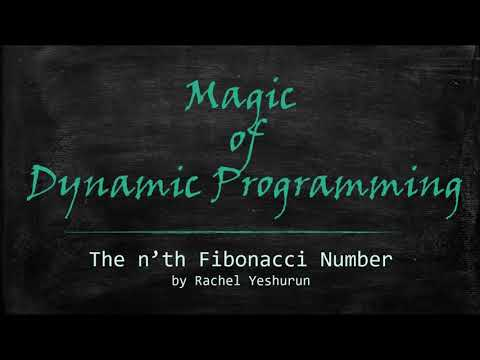

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('0jMoTRxQ52k')

Let's first code up the naive recursive implementation of finding the n'th Fibonacci number.

In [2]:
def fib(n):
    
    ##############
    # YOUR CODE ##
    ##############
    
    return 0

In [3]:
#### unit tests #####

# assert(fib(0) == 1)
# assert(fib(1) == 1)
# assert(fib(2) == 1)
# assert(fib(10) == 55)

In the following exercise use the magic %timeit command to see how long a call to fib takes.

In [4]:
%timeit fib(10)

56.1 ns ± 1.61 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


<div class="alert alert-warning">
The next cell may take some time to run. ☕ You can interrupt the notebook kernel if you run out of patience ...
</div>

In [5]:
%timeit fib(40)

55.4 ns ± 2.08 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Time complexity of the naive Fibonacci algorithm
Let's explore how many inner nodes and leaves the call stack tree of fib(n) has. The point of this excercise is to get a feel for the running time complexity and also to get very comfortable with the call stacks of recursive functions. I suggest you work out the following quizzes on a piece of paper.

The inner nodes are all themselves call trees of fib(n-k) where k runs from 0 to n-3. For example, if we're counting up the inner nodes of fib(8), we want to know how many calls there were to fib(8), fib(7), fib(6), fib(5), fib(4) and fib(3).

In [6]:
%run quizzes/quiz.py quizzes/02/fibonacci_n_minus_k.json

VBox(box_style='info', children=(HBox(children=(Label(value='Given k between 0 and n - 3, how many nodes of ty…

Now add up all those sub-trees to get the general formula for the number of **inner nodes** in the fib(n) call tree

In [7]:
%run quizzes/quiz.py quizzes/02/fibonacci_inner_nodes.json

VBox(box_style='info', children=(HBox(children=(Label(value='How many inner nodes does the call tree of fib(n)…

Now we'll get a general formula for the number of leaves, starting with a small example where n = 8. Remember that our base cases are when n = 1 and n = 2, so we'll count up the calls to fib(1) and fib(2).

In [8]:
%run quizzes/quiz.py quizzes/02/fibonacci_1_and_2.json

VBox(box_style='info', children=(HBox(children=(Label(value='Fill in the blanks with a whole number.', layout=…

As you can see from the exercises above, the recursive algorithm for finding the n'th Fibonacci number mostly spends its time calculating and recalculating the Fibonacci numbers of the numbers preceding n. Every leaf in the call stack tree adds 1 to the time complexity of this algorithm - how many leaves does this tree have exactly?

In [9]:
%run quizzes/quiz.py quizzes/02/fibonacci_leaves.json

VBox(box_style='info', children=(HBox(children=(Label(value='Fill in the blank with regard to our implementati…

Well it's no wonder that the complexity of this algorithm grows exponentially - it grows just like the Fibonacci numbers themselves!


## Fibonacci Revisited
Now's the time to pull out your memoization skills and make our naive algorithm efficient by storing any calculations you already made.

### Memoize Fibonacci - without using a function decorator

<div class="exercise exercise-info">
If you like, as an exercise, write a memoized version of fib(n) without using Python's decorator, i.e go ahead and make changes inside fib(n) itself. As a hint, I defined the function signature and unit tests for you.

In [10]:
def fib(n, memo):
    
    ##############
    # YOUR CODE ##
    ##############
    
    return 0
    
### unit tests ###
#assert(fib(1, {}) == 1)
#assert(fib(2, {}) == 1)
#assert(fib(3, {}) == 2)
#assert(fib(4, {}) == 3)
#assert(fib(5, {}) == 5)
#assert(fib(6, {}) == 8)

### Memoize Fibonacci - a more elegant way

<div class="exercise exercise-info">
Use the same function we used to decorate 'factorial' in the previous lesson. 
<hr>
This time, since we didn't change our original function, we also don't need to change our tests! (that was the whole point of using Python's function decorators)

In [11]:
def memoize(f):
    ##############
    # YOUR CODE ##
    ##############
    return 0
    
@memoize
def fib(n):
    ##############
    # YOUR CODE ##
    ##############
    return 0
    
#unit tests
#assert(fib(1) == 1)
#assert(fib(2) == 1)
#assert(fib(6) == 8)

<div class="exercise exercise-info">
After testing, use the magic command %time to profile this implementation. If you use %%timeit you'll get a more accurate time, but it will take longer since %%timeit runs your function a few times.
</div>    

In [12]:
# %time fib(36)

In [ ]:
### Memoize Fibonacci - using _constant_ space instead of linear space
One problem with our memoized version is that the storage is also linear, so as n gets large, you'll be using O(n) space to store all the previous solutions. Since each Fibonacci number is the sum of the previous two, you actually only need _two_ places of storage as you iterate.

Write an implementation to find the n'th Fibonacci number, **without** using a memo dictionary. Use only two storage variables.

In [13]:
# Only use two storage variables

def fib(n):
    ##############
    # YOUR CODE ##
    ##############
    return 0

### Memoize Fibonacci - and convert the algorithm to iterative and bottom up
Using a Python decorator function, memoize AND convert fib(n) to an efficient AND iterative solution.

**Hint 1:** The decorator function is almost identical to the memoize function we used for factorial and fib(n) above. The only difference is that you want to prevent recursion from happening and instead iterate starting from 1.

**Hint 2:** Pay attention to the case where n = 0. The function should return 1 and you'll need to initialize the memo dictionary for this case to be handled correctly.

In [14]:
def iterate(f):
    ##############
    # YOUR CODE ##
    ##############
    return 0
    
@iterate
def fib(n):
    ##############
    # YOUR CODE ##
    ##############
    return 0
    
#### unit tests ###
#assert(fib(0) == 1)
#assert(fib(1) == 1)
#assert(fib(2) == 1)
#assert(fib(6) == 8)

<div class="exercise exercise-info">
If you haven't done so already, add some logging (prints) to your solution to see how the algorithm grows the memo dictionary.
</div>    

## Solutions
Given a whole number n, all these implementations calculate the n'th Fibonacci number.

### Recursive solutions
These solutions show the top-down approach.

<div class="exercise exercise-warning"><details><summary>Naive fibonacci, runs in exponential time ...</summary>

    
```python    
    # %load solutions/02/fibonacci_n.py
    def fib(n):

        if (n <= 2):
            return 1

        return (fib(n - 1) + fib(n - 2))
```

</details>

<div class="exercise exercise-warning"><details><summary>Recursive fibonacci memoized by changing function (no decorator)</summary>

    
```python    
    # %load solutions/02/fibonacci_memo.py
    def fib(n, memo):
        if n in memo:
            return memo[n]
        if n <= 2:
            f = 1
        else:
            f = fib(n-1, memo) + fib(n-2, memo)
        memo[n] = f
        return memo[n]

    ### unit tests ###
    #assert(fib(1, {}) == 1)
    #assert(fib(2, {}) == 1)
    #assert(fib(3, {}) == 2)
    #assert(fib(4, {}) == 3)
    #assert(fib(5, {}) == 5)
    #assert(fib(6, {}) == 8)
```

</details>

<div class="exercise exercise-warning"><details><summary>Recursive fibonacci, memoized</summary>

    
```python    
    # %load solutions/02/fibonacci_memo_decorated.py
    def memoize(f):
        memo = {}

        def helper(n):
            if n not in memo:
                memo[n] = f(n)
            return memo[n]

        return helper

    @memoize
    def fib(n):
        if n <= 2:
            return 1
        return fib(n - 1) + fib(n - 2)

    #assert(fib(1) == 1)
    #assert(fib(2) == 1)
    #assert(fib(6) == 8)
```

</details>

### Iterative solutions
These solutions exemplify the bottom-up approach.

<div class="exercise exercise-warning"><details><summary>Iterative fibonacci that uses <em>linear</em> storage (with decorator)</summary>

    
```python    
    # %load solutions/02/fibonacci_iterative_decorated.py
    def iterate(f):
        memo = {0:0}

        def helper(n):
            # print ('helper called for ', n)
            if n not in memo:
                for k in range(1, n + 1):
                    memo[k] = f(k)
            # print(memo)
            return memo[n]
        return helper

    @iterate
    def fib(n):
        if n <= 2:
            return 1
        return fib(n - 1) + fib(n - 2)

    #unit tests
    #assert(fib(0) == 1)
    #assert(fib(1) == 1)
    #assert(fib(2) == 1)
    #assert(fib(6) == 8)
```

</details>

<div class="exercise exercise-warning"><details><summary>Iterative fibonacci that uses <em>constant</em> space (no decorator)</summary>

    
```python    
    # %load solutions/02/fibonacci_tiny_memo.py
    def fib(n):
        f, next_total = 1, 1
        for i in range(n-1):
            f, next_total = next_total, next_total + f
        return f

    #assert(fib(1) == 1)
    #assert(fib(2) == 1)
    #assert(fib(6) == 8)
```

</details>

<div class="exercise exercise-warning"><details><summary>Iterative fibonacci  <em>constant</em> space (with decorator)</summary>

    
```python    
    # %load solutions/02/fibonacci_tiny_memo_decorated.py
    # TODO

    #assert(fib(1) == 1)
    #assert(fib(2) == 1)
    #assert(fib(6) == 8)
```
</details>


## References

1. Andres, F. (n.d.). functional programming—What do you call a function where the same input will always return the same output, but also has side effects? Software Engineering Stack Exchange. Retrieved July 9, 2020, from https://softwareengineering.stackexchange.com/a/317249

2. Forišek, M. (2015). Towards a better way to teach dynamic programming. Olympiads in Informatics, 9, 45–55.

3. Klein, B. (n.d.). Python Tutorial: Memoization and Decorators. Python Course. Retrieved June 17, 2020, from https://www.python-course.eu/python3_memoization.php

In [15]:
# workaround for known ipywidget issue not rendering alert style colours on Jupyter lab
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())